<a href="https://colab.research.google.com/github/mariasald/avd-2024-01/blob/main/Atividade_Pr%C3%A1tica_2_Gera%C3%A7%C3%A3o_de_VA_e_fila_M_M_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alunos

* Gabriel César Tavares Ferreira - 21854868
* Maria Luiza Saldanha - 22153140

#Bibliotecas Utilizadas

In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats
from scipy.special import factorial

#BibAD (1o Trabaho)



In [2]:
def mediaAritmetica(nums):
    return round((sum(nums) / len(nums)), 3)

def var_amostral(nums):
  med = mediaAritmetica(nums)
  quad = np.sum(np.fromiter(((x - med) * (x - med) for x in nums), dtype=float))
  var = quad / len(nums)
  return round(var)

def desvio_padrao(nums):
  return round(math.sqrt(var_amostral(nums)))

def intervaloConfianca(nums, z):
    nivelConfianca = z / 100
    a = 1 - nivelConfianca
    z_a = 1 - (a / 2)
    distribuicao = scipy.stats.norm.ppf(z_a)
    erroPadrao = distribuicao * desvio_padrao(nums) / math.sqrt(len(nums))

    return [round((mediaAritmetica(nums) - erroPadrao), 3), round((mediaAritmetica(nums) + erroPadrao), 3)]

# 1. Implementar em Python uma VA Exponencial chamada X, com média β=1/9 utilizando o gerador de N.A. do Python.

VA Exponencial com média β
 * o Gerar U ~ U[0, 1]
 * o Retornar $X = -β \ ln (1 – U)$


In [3]:
def va_exponencial(media):
  u = random.random()
  x = -media * math.log (1 - u)
  return round(x,3)

print(va_exponencial(1/9)) #nao esquecer de ver quando receber taxa e quando receber media!!!!!

0.011


Primeiros 10 resultados para média β = 1/9 (taxa = 9):

0.023,
0.0,
0.156,
0.078,
0.016,
0.014,
0.435,
0.027,
0.077,
0.002

A distribuição exponencial é usada para modelagem do tempo de espera em filas e do tempo de vida de componentes, por exemplo.
A função va_exponencial é usada para gerar tais valores de acordo com essa distribuição, dada uma média ou uma taxa.

# 2. Implementar em Python uma VA Erlang chamada Y, com 4 estágios e média β=1/9 utilizando o gerador de N.A. do Python.

VA Erlang com k estágios e média λ
 * o Gerar Ui ~ U[0, 1], i= 1,..., k
 * o Retornar $X=\frac{-\lambda}{k}ln(\displaystyle\prod_{i=1}^k U^i)$

In [4]:
def va_erlang(media, estagios):
  Ui = [random.random() for _ in range(estagios)]
  produto_Ui = 1.0
  for numero in Ui:
    produto_Ui *= numero

  y = -media * estagios * math.log(produto_Ui)

  return round(y,3)

print(va_erlang(1/9, 4))

0.82


Primeiros 10 resultados para média β = 1/9 (taxa = 9) e 4 estágios:

1.479,
2.23,
1.504,
0.824,
1.268,
2.888,
3.004,
1.032,
3.98,
2.034.

A distribuição Erlang é utilizada em situações onde eventos ocorrem em fases ou estágios como no processamento de filas.

A função va_erlang gera valores aleatórios seguindo a distribuição, permitindo simulações para múltiplos eventos exponenciais precisam ser modelados em conjunto.

# 3. Gerar a função cumulativa de distribuição F(x) e F(y).

É uma função que representa a probabilidade acumulada de uma variável aleatória ser menor ou igual a um determinado valor.

In [5]:
def cumulativa_exponencial(taxa, x_min=0, x_max=5, pontos=100):
  valores_x = np.linspace(x_min, x_max, pontos)
  pontos_cumulativo = 1 - np.exp(-taxa * valores_x)
  return valores_x, pontos_cumulativo

A função cumulativa_exponencial é utilizada para visualizar a distribuição acumulada de tempos entre eventos a distribuição exponencial.

In [6]:
def cumulativa_erlang(taxa, estagios, y_min=0, y_max=10, pontos=100):
    valores_y = np.linspace(y_min, y_max, pontos)
    pontos_cumulativo = []

    for y in valores_y:
        soma = 0
        for i in range(estagios):
            soma += (taxa * y)**i / factorial(i)
        cdf = 1 - np.exp(-taxa * y) * soma
        pontos_cumulativo.append(cdf)

    return valores_y, pontos_cumulativo

A função cumulativa_erlang é utlizada para visualizar a distribuição acumulada de tempos de serviço com eventos ocorrem em múltiplos estágios.

# 4. Plotar F(x) e F(y).

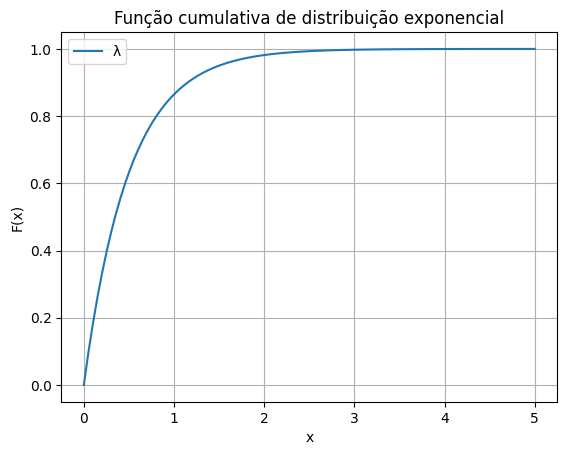

In [7]:
valores_x, pontos_cumulativo = cumulativa_exponencial(2)

plt.plot(valores_x, pontos_cumulativo, label=f'λ')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Função cumulativa de distribuição exponencial')
plt.legend()
plt.grid(True)
plt.show()

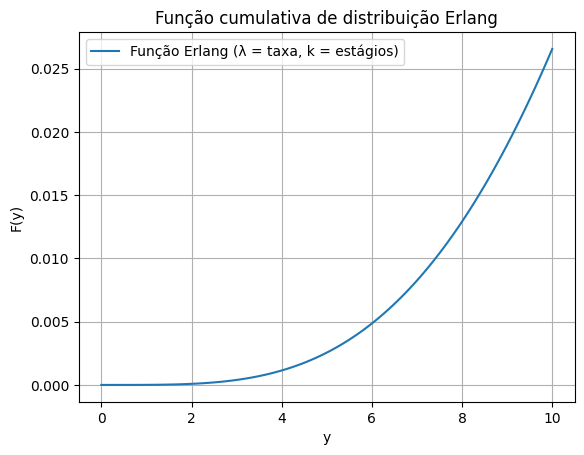

In [8]:
valores_y, pontos_cumulativo = cumulativa_erlang(1/9, 4)

plt.plot(valores_y, pontos_cumulativo, label=f'Função Erlang (λ = taxa, k = estágios)')
plt.xlabel('y')
plt.ylabel('F(y)')
plt.title('Função cumulativa de distribuição Erlang')
plt.legend()
plt.grid(True)
plt.show()

# 5. Implementar em Python uma fila M/M/1.
  * taxa de entrada: λ=9 clientes por segundo
  * taxa de serviço: μ=10 clientes por segundo.


In [16]:
def fila_mm1(taxa_chegada, taxa_servico, clientes_total):
    rho = taxa_chegada / taxa_servico
    E_X = (rho / taxa_servico) / (1 - rho)

    tempos_chegada = np.cumsum([va_exponencial(1/taxa_chegada) for _ in range(clientes_total)])
    tempos_servico = [va_exponencial(1/taxa_servico) for _ in range(clientes_total)]

    tempos_espera = np.zeros(clientes_total)
    tempo_livre = 0

    for i in range(clientes_total):
        if tempos_chegada[i] > tempo_livre:
            tempos_espera[i] = 0
            tempo_livre = tempos_chegada[i] + tempos_servico[i]
        else:
            tempos_espera[i] = tempo_livre - tempos_chegada[i]
            tempo_livre += tempos_servico[i]

    X_n = np.mean(tempos_espera)
    confidencia = 0.95
    z = scipy.stats.norm.ppf(1 - (1 - confidencia) / 2)
    erro_padrao = np.std(tempos_espera, ddof=1) / np.sqrt(clientes_total)
    intervalo_confianca = (X_n - z * erro_padrao, X_n + z * erro_padrao)

    return {
        "tempo_medio_espera_simulado": round(X_n, 3),
        "intervalo_confianca_95": (round(intervalo_confianca[0], 3), round(intervalo_confianca[1], 3)),
        "tempo_medio_espera_teorico": round(E_X, 3)
    }


O tempo de espera representa o período de tempo que um cliente aguarda até ser atendido. Em uma fila M/M/1, como na função fila_mm1, o tempo de espera é determinado pela diferença entre o momento em que o cliente chega ao sistema e o momento em que o serviço é iniciado para esse cliente.

A média de execução se refere ao tempo médio que um determinado atendimento leva para ser concluído. A média de execução está relacionada ao tempo médio que um cliente leva desde sua chegada até a conclusão do serviço, incluindo tanto o tempo de espera na fila quanto o tempo de serviço em si.

Já o intervalo de confiança, indica que existe uma probabilidade de 95% de que a verdadeira média do tempo de espera esteja dentro do intervalo calculado.

# 6. Executar a simulação da fila M/M/1 gerando $n$ clientes:

* $n=10^3,n=10^6,n=10^9,n=10^{12}$

* Calcular o tempo de espera $x_{i}$ na fila para cada cliente $i$


* Estimar o tempo médio $\bar{X}(n)$ de espera na fila M/M/1 e um intervalo de confiança de 95%.

* Comparar com o valor esperado. Da Teoria das Filas, esse valor é dado por $E[X]=\rho \frac{1/\mu}{1-\rho}$, onde $p=\frac{\lambda}{\mu}$

In [24]:
resultados = fila_mm1(9, 10, 10**3)
print(resultados)

{'tempo_medio_espera_simulado': 1.216, 'intervalo_confianca_95': (1.139, 1.292), 'tempo_medio_espera_teorico': 0.9}


Tempo média de espera: O tempo médio de espera simulado é de aproximadamente 1.216 unidades de tempo. O valor teórico é de 0.9 unidades de tempo.

O intervalo de confiança de 95% para o tempo médio de espera é de aproximadamente (1.139, 1.292) unidades de tempo.

In [29]:
resultados = fila_mm1(9, 10, 10**6)
print(resultados)

{'tempo_medio_espera_simulado': 0.853, 'intervalo_confianca_95': (0.852, 0.855), 'tempo_medio_espera_teorico': 0.9}


O tempo médio de espera simulado é de aproximadamente 0.925 unidades de tempo. O valor teórico é de 0.9 unidades de tempo.

O intervalo de confiança de 95% para o tempo médio de espera é de aproximadamente (0.923, 0.927) unidades de tempo.

In [ ]:
resultados = fila_mm1(9, 10, 10**9)
print(resultados)

In [ ]:
resultados = fila_mm1(9, 10, 10**12)
print(resultados)